In [11]:
print("Task: Data Exploration and Preprocessing")

Task: Data Exploration and Preprocessing


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

df = pd.read_csv("Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [29]:
#Rows and Columns

print("Rows- " , df.shape[0])
print("Column- ", df.shape[1])

Rows-  9551
Column-  21


In [31]:
#Null entries 
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [17]:
#Dealing with null entries by filling rows with median and columns with mode 
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [21]:
#Aggregate Rating
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

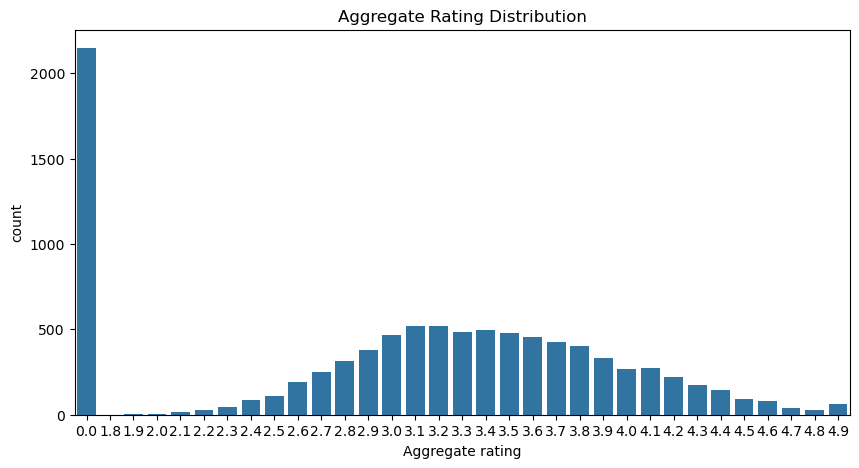

In [33]:
#Aggregate Rating DIstribution
plt.figure(figsize=(10,5))
sns.countplot(x=df['Aggregate rating'])
plt.title("Aggregate Rating Distribution")
plt.show()

In [25]:
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [27]:
df['Aggregate rating'].value_counts(normalize=True) * 100

Aggregate rating
0.0    22.489792
3.2     5.465396
3.1     5.433986
3.4     5.214114
3.3     5.057062
3.5     5.025652
3.0     4.900010
3.6     4.795309
3.7     4.470736
3.8     4.188043
2.9     3.989111
3.9     3.507486
2.8     3.298084
4.1     2.868810
4.0     2.785049
2.7     2.617527
4.2     2.313894
2.6     1.999791
4.3     1.821799
4.4     1.507696
2.5     1.151712
4.5     0.994660
2.4     0.910899
4.6     0.816668
4.9     0.638677
2.3     0.492095
4.7     0.439745
2.2     0.282693
4.8     0.261753
2.1     0.157052
2.0     0.073291
1.9     0.020940
1.8     0.010470
Name: proportion, dtype: float64